In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sys
sys.path.append('..')
from src.model import SalesPredictor
from src.utils import calculate_metrics

In [2]:
# Load the processed and featured data
featured_df = pd.read_csv('../data/processed/processed_sales_data.csv')
# Prepare features and target
target = 'Sales_Revenue'
feature_cols = [col for col in featured_df.columns if col != target and 'Date' not in col]
X = featured_df[feature_cols]
y = featured_df[target]

In [3]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)
# Train the model
predictor = SalesPredictor()
training_info = predictor.train(X_train, y_train)
# Make predictions\n",
train_pred = predictor.predict(X_train)
test_pred = predictor.predict(X_test)

INFO:src.model:Starting model training...
INFO:src.model:Preprocessing categorical features...
INFO:src.model:Detected categorical columns: ['Product_Description', 'Product_Category', 'Product_Line', 'Raw_Material', 'Region']
INFO:src.model:Model training completed successfully


In [4]:
# Initialize predictor
predictor = SalesPredictor()

# Train model (handles categorical features automatically)
training_results = predictor.train(X_train, y_train)

# Make predictions
predictions = predictor.predict(X_test)

# Save model with preprocessing information
predictor.save_model('sales_predictor.joblib')

# Load model later
new_predictor = SalesPredictor()
new_predictor.load_model('sales_predictor.joblib')

INFO:src.model:Starting model training...
INFO:src.model:Preprocessing categorical features...
INFO:src.model:Detected categorical columns: ['Product_Description', 'Product_Category', 'Product_Line', 'Raw_Material', 'Region']
INFO:src.model:Model training completed successfully


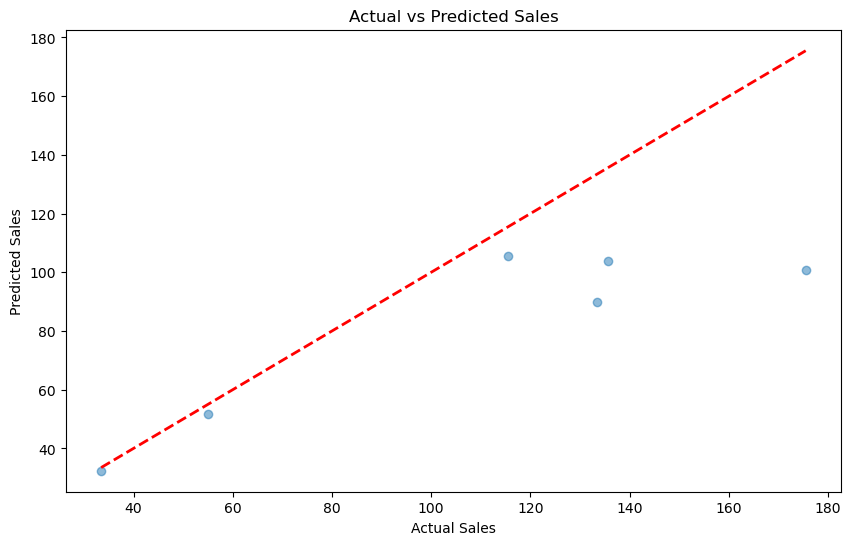

In [7]:
# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()